<a href="https://colab.research.google.com/github/ddebashish21/Covid-prediction/blob/main/Covid_Prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification for the prediction of Covid-19 using lung's X-ray**

The dataset contains images of the lung's X-ray of normal people and the lung's X-ray of Covid-19 patients. The aim of the project is to train a model to distinguise the covid-19 patients from the normal patients using the X-ray images.

In [1]:
# Importing all the essential libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2

In [4]:
# Creating the directories for storing image datas
!mkdir covid_dataset

In [5]:
mkdir covid_dataset/train

In [6]:
mkdir covid_dataset/test

In [7]:
mkdir covid_dataset/train/covid

In [8]:
mkdir covid_dataset/train/normal

In [9]:
mkdir covid_dataset/test/covid

In [10]:
mkdir covid_dataset/test/normal

In [11]:
# Storing the address of training and testing datas
ref={"train": "/content/covid_dataset/train",
     "test": "/content/covid_dataset/test"}

**Preprocessing the image dataset for training**

In [12]:
# Preprocessing the training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [13]:
# Preprocessing the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_data = train_datagen.flow_from_directory(ref["train"],
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 181 images belonging to 2 classes.


In [15]:
testing_data = test_datagen.flow_from_directory(ref["test"],
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 46 images belonging to 2 classes.


In [16]:
print(training_data.class_indices)
print(testing_data.class_indices)

{'covid': 0, 'normal': 1}
{'covid': 0, 'normal': 1}


In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu')) # 1st Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # 1st Pooling layer using the maximum value
model.add(Conv2D(16,(3,3),activation='relu')) # 2nd Convokution layer
model.add(MaxPooling2D(pool_size=(2,2))) # 2nd Pooling layer using the maximum value
model.add(Flatten()) # Fully-connected layer

In [19]:
# Adding 3 hidden layers of Neural network
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [20]:
# Compiling the model using accuracy metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
# Training the model using the training dataset and validating it using testing dataset
model.fit(training_data,
          steps_per_epoch=int(len(training_data)/32),
          epochs=5,
          validation_data=testing_data,
          validation_steps=int(len(testing_data)/32))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.5228 - loss: 0.6828 - val_accuracy: 0.9348 - val_loss: 0.6238
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 0.7695 - loss: 0.6088 - val_accuracy: 0.9130 - val_loss: 0.4519
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.8236 - loss: 0.4509 - val_accuracy: 0.8043 - val_loss: 0.4082
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.8764 - loss: 0.3081 - val_accuracy: 0.9130 - val_loss: 0.2468
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.8558 - loss: 0.2955 - val_accuracy: 0.9348 - val_loss: 0.2155


**Testing the models accuracy using images manually**

In [22]:
# importing the necessary libraries
import keras.preprocessing.image as image
import numpy as np

In [30]:
# Setting the dimension of the image according to the model requirements
covid_img=image.load_img('/content/covid_dataset/test/covid/COVID-00003b.jpg',target_size=(64,64))
normal_img=image.load_img('/content/covid_dataset/test/normal/0105.jpeg',target_size=(64,64))

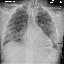

In [31]:
covid_img

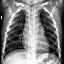

In [32]:
normal_img

In [33]:
# Normalizing the pixels and expanding the size of the image
covid_img=image.img_to_array(covid_img)
normal_img=image.img_to_array(normal_img)
covid_img=covid_img/255.
normal_img=normal_img/255.
covid_img=np.expand_dims(covid_img,axis=0)
normal_img=np.expand_dims(normal_img,axis=0)

In [34]:
# Defining the classes with the respective name
res={0: "Covid",
     1: "Normal"}

In [36]:
print(res[round(model.predict(covid_img)[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Covid


In [37]:
print(res[round(model.predict(normal_img)[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Normal


After running the model through all 5 epochs we had set, the accuracy comes around 85.58% and the loss is around 29.55% and when the model is compared with the testing data the accuracy comes around 93.48% and the loss comes around 21.55%. We had further tried to take two randon images from the dataset and fed the model for prediction and the model has rightfully predicted the outcome.